## Financial Big Data Project : Impact of Louvain clustering on GMVP strategy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from data_cleaning import load_trade
from refreshTime import harmoniz_data,refresh_time
from back_test import daily_back_testing,impor_data
import seaborn as sns

Date = pd.bdate_range('2010-01-01','2010-12-31')[1:] #We do not take the 1er January where there is no trades
Market_name = np.array(['AAPL.OQ','AMGN.OQ','AXP.N','BA.N','CAT.N','CSCO.OQ','CVX.N','DOW.N','GS.N','SPY.P','UTX.N','V.N','WMT.N'])

#folder_path = 'D:/GitHub/ML_For_Finance/big data/data/data/'

folder_path ='D:/GitHub/ML for Finance project/ML_For_Finance/big data/Data/data/'
#folder_path = '/Users/franckatteaka/Desktop/cours/Semester III/Financial big data/high freq data/'

## Section 2 : Data Analysis

In [11]:
n=len(Date)
m=len(Market_name)
market_size = np.zeros((n,m))

for i in range(n):
    temp = impor_data(Market_name,Date[i],folder_path)
    for j in range(m):
        market_size[i,j]=len(temp[j])


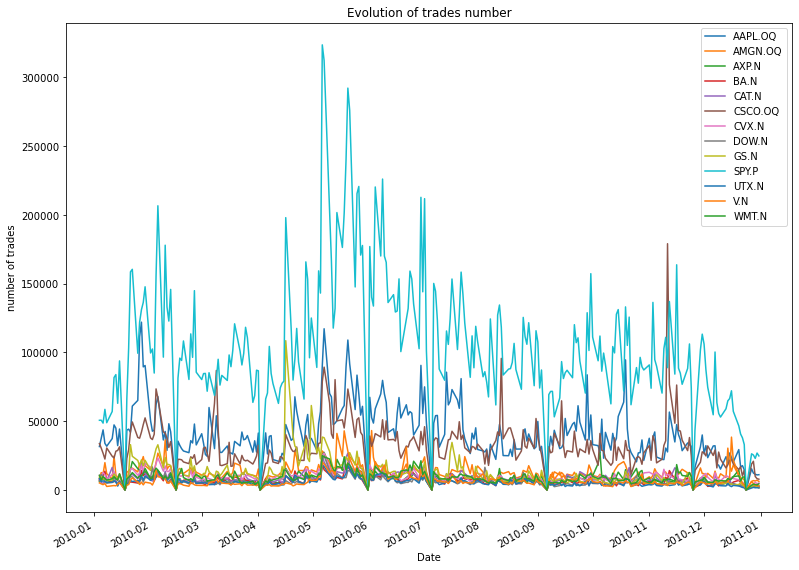

In [13]:
plt.figure(figsize=(13,10))
for j in range(m):
    plt.plot(Date,market_size[:,j],label=Market_name[j])
    
plt.legend()
plt.ylabel("number of trades")
plt.xlabel('Date')
plt.title('Evolution of trades number')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
        
plt.gcf().autofmt_xdate()
plt.savefig('figures/number_trades.pdf')

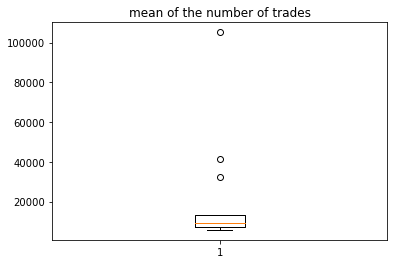

,mean trades
AAPL.OQ,41213.073077
AMGN.OQ,13022.373077
AXP.N,8417.542308
BA.N,6781.303846
CAT.N,8532.884615
CSCO.OQ,32440.665385
CVX.N,9982.492308
DOW.N,6068.430769
GS.N,12532.361538
SPY.P,105240.903846


In [22]:
mean_number = np.mean(market_size,axis=0)
plt.boxplot(mean_number)
plt.title('mean of the number of trades')
plt.savefig('figures/boxplot mean number of trades.pdf')
plt.show()
DF = pd.DataFrame(data=mean_number[np.newaxis,:].T,index=Market_name,columns=['mean trades'])
DF

In [23]:
num_0 =0
for i in range(n):
    if min(market_size[i])==0:
        num_0+=1
print('number of day where at least one market has 0 trades :',num_0)

number of day where at least one market has 0 trades : 8


## Section 3 : Data synchronisation

In [10]:
n=len(Date)
m=len(Market_name)
tau = np.zeros((n))

for i in range(n):
    temp1 = impor_data(Market_name,Date[i],folder_path)
    if min([len(df) for df in temp1])>0:
        temp2 = refresh_time(temp1)
        tau[i]=len(temp2)
    else :
        tau[i]=0

No handles with labels found to put in legend.


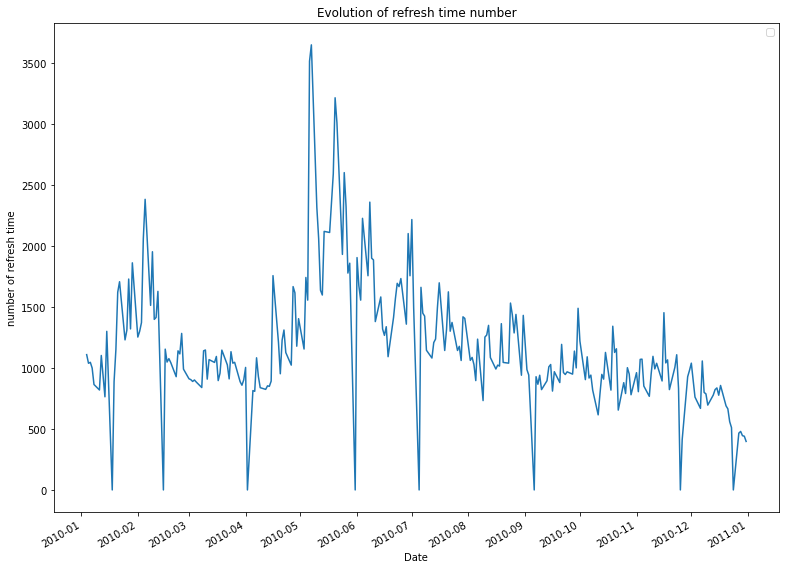

In [15]:
plt.figure(figsize=(13,10))

plt.plot(Date,tau)
    
plt.legend()
plt.ylabel("number of refresh time")
plt.xlabel('Date')
plt.title('Evolution of refresh time number')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
        
plt.gcf().autofmt_xdate()
plt.savefig('figures/number_refresh_time.pdf')

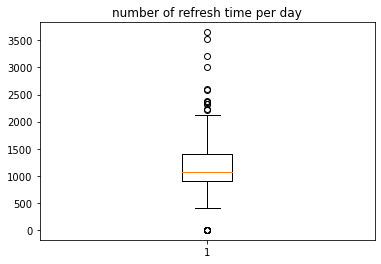

In [16]:
plt.boxplot(tau)
plt.title('number of refresh time per day')
plt.savefig('figures/boxplot number of refresh time per day.pdf')
plt.show()

In [17]:
print('mean of refresh time number :',np.mean(tau))
print('std of refresh time number :',np.std(tau))

mean of refresh time number : 1182.8153846153846
std of refresh time number : 527.7971169743072


## Section 4 Louvain and GMVP performance

In [2]:
nday_init=0
nday_end=20  #len(Date)-1
backtesting1=daily_back_testing(Market_name,folder_path,Date[nday_init:nday_init+5])
l=nday_end-nday_init-5
for i in range(nday_init+5,nday_end+1):
    backtesting1.daily_update(Date[i])
    print('avancement : %f '%((i-nday_init-5)/l))

avancement : 0.666667 
avancement : 0.733333 
avancement : 0.800000 
avancement : 0.866667 
avancement : 0.933333 
avancement : 1.000000 
avancement : 1.066667 
avancement : 1.133333 
avancement : 1.200000 
avancement : 1.266667 
avancement : 1.333333 
avancement : 1.400000 
avancement : 1.466667 
avancement : 1.533333 
avancement : 1.600000 
avancement : 1.666667 


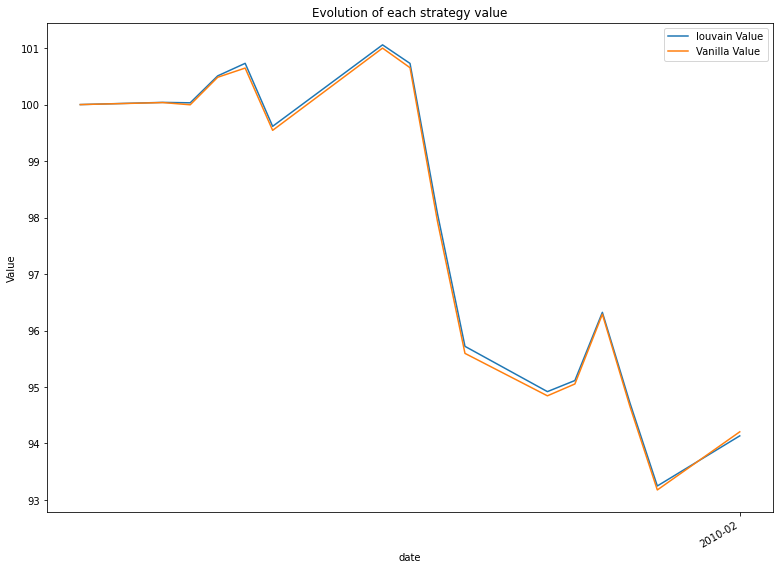

In [3]:
backtesting1.plot_value()

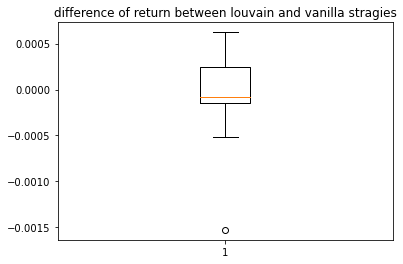

In [4]:
diff_return = np.array(backtesting1.louvain_return)-np.array(backtesting1.vanilla_return)
plt.boxplot(diff_return)
plt.title('difference of return between louvain and vanilla stragies')
plt.savefig('figures/boxplot difference between louvain and vanilla strategies.pdf')
plt.show()

In [5]:
n=len(backtesting1.louvain_return)
temp=[backtesting1.louvain_return[i]==backtesting1.vanilla_return[i] for i in range(n)]
print('number of time where the number of louvain cluster is 1 :', sum(temp))
print('rate of time where the number of louvain cluster is 1 :', sum(temp)/n)

number of time where the number of louvain cluster is 1 : 0
rate of time where the number of louvain cluster is 1 : 0.0


In [6]:
print('std of louvain return : ',np.mean(backtesting1.louvain_return))
print('std of vanilla return : ',np.mean(backtesting1.vanilla_return))

std of louvain return :  -0.003945665313061835
std of vanilla return :  -0.0038926037336462606


In [7]:
print('std of louvain return : ',np.std(backtesting1.louvain_return))
print('std of vanilla return : ',np.std(backtesting1.vanilla_return))

std of louvain return :  0.012253374368717575
std of vanilla return :  0.012473680582142738


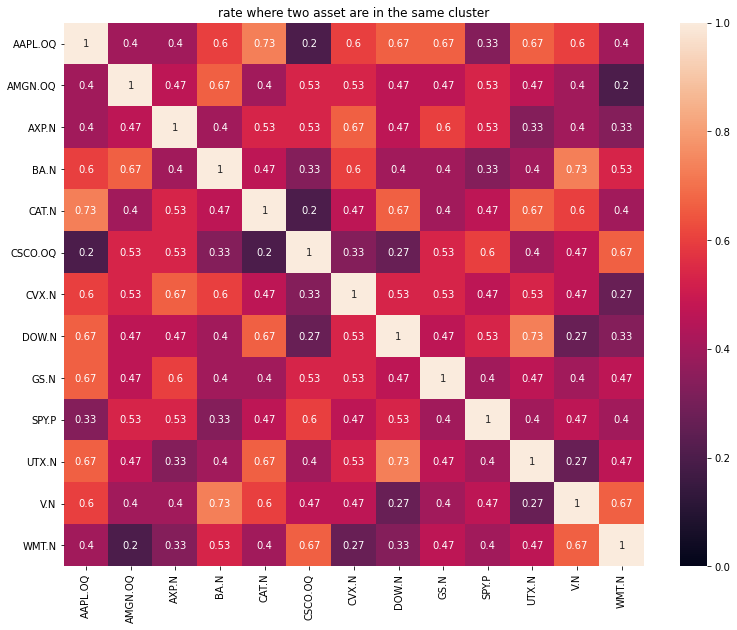

In [8]:
plt.figure(figsize=(13,10))
sns.heatmap(backtesting1.louvain_cluster/backtesting1.nombre_test,vmin=0, vmax=1,annot=True)
plt.title('rate where two asset are in the same cluster')
plt.savefig('figures/rate_two_assets_in_the_same_cluster.pdf')

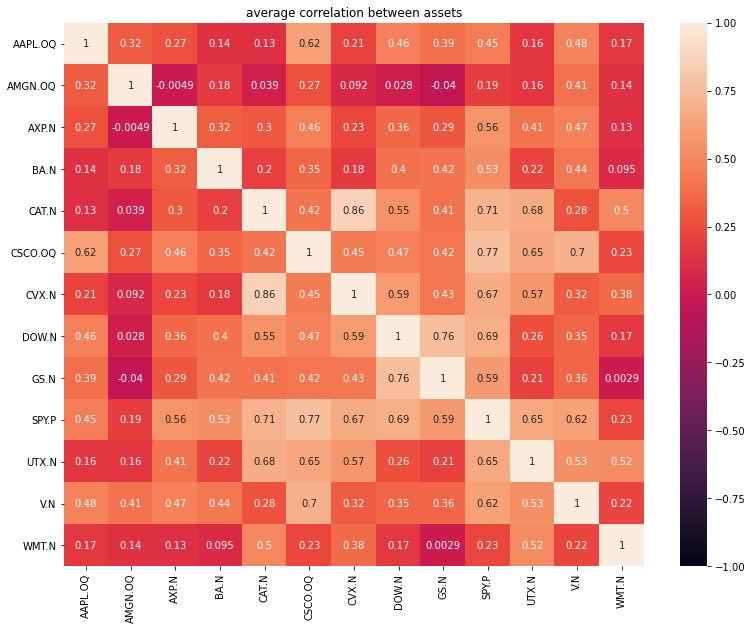

In [9]:
plt.figure(figsize=(13,10))
sns.heatmap(backtesting1.correlation/backtesting1.nombre_test,vmin=-1, vmax=1,annot=True)
plt.title('average correlation between assets')
plt.savefig('figures/correlation_heatmap.pdf')